# Esercitazione 1

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

def plot_separation(X, y, a, a0, name=None):
    '''
    Input: X vettore 2xn dove la colonna j rappresenta il punto j nello spazio delle features
        y: vettore di dimensione n, y[j] è l'etichetta di X[:,j:j+1] (colonna j di X)
        a: vettore 2x1
        a0: float, rappresentano i coefficienti del piano di separazione
    Output: None, crea un file png che mostra lo spazio delle features e il piano di separazione
    '''
    plt.scatter(X[0:1,:], X[1:2,:], c=['g' if lab == 1 else 'r' for lab in y], s=7)
     
    ax = plt.gca()
    
    # piano di separazione
    xlim_left, xlim_right = ax.get_xlim()
    ylim_bottom, ylim_top = ax.get_ylim()
    
    plt.plot( ( xlim_left, xlim_right) , [ (-x*a[0][0]-a0)/a[1][0] for x in  (xlim_left, xlim_right) ],\
             linewidth=1,
             c = 'b', zorder=0 ) # a0 è una matrice di dimensione 1x1
     
    arrow_size = 0.05
   
   # assi 
    plt.arrow( xlim_left, 0, xlim_right-xlim_left, 0,   width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='lightgrey', zorder=-1)
    plt.arrow( 0, ylim_bottom, 0, ylim_top-ylim_bottom,   width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='lightgrey', zorder=-1)    


    # plot del vettore perpendicolare al piano
    
    # punto centrale del piano
    mx = (xlim_left+xlim_right)/2
    my = (-mx*a[0][0]-a0)/a[1][0]

    
    
    u = a/np.linalg.norm(a) # vettore unitario ortogonale ad a
    
    # spostiamo l'origine del vettore a sul punto (mx, my) 
    plt.arrow(mx, my, u[0][0], u[1][0], width=0.01,\
              head_width= arrow_size, length_includes_head=True,\
              color='orange', zorder=0)
    
        
    
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xbound(xlim_left, xlim_right)
    ax.set_ybound(ylim_bottom, ylim_top)
    
    if name != None:
        plt.savefig(name, dpi=600)

    plt.show()

def perceptron( X, y, t = 100 ):
    '''
    Parameters
    ----------
    X : vettore (ndarray) d x n dove d è lo spazio delle features, n numero degli esempi
    y : vettore delle etichette, di dimensione
    t : intero positivo, numero massimo di iterazioni

    Returns
    -------
    a : vettore dei cefficienti dell'iperpiano di dimensione d
    a0: termine noto
    '''
    
    d, n = X.shape
    
    a = np.zeros( (d, 1) )
    a0 = 0
    
    for j in range(t):
        finito = True
        for i in range(n):
            x = X[:,i:i+1] # colonna i di X
            if y[i]*(a.T.dot(x) + a0) <= 0:
                a = a + x*y[i]
                a0 = a0 + y[i]
                finito = False
        if finito: # equivalente a finito == True
            break
                
    return a, a0

def sign(a, a0, x):
    '''
    Parameters
    ----------
    a : coefficienti, ndarray shape (dx1)
    a0 : termine noto
    x : ndarray shape (dx1)

    Returns
    -------
    int: 1 se ax+a0 > 0 -1 altrimenti

    '''
    # a e x sono matrici, dot è il prodotto tra matrici
    # quindi a.T.dot(x) è una matrice di dimensione 1x1
    # e il suo unico elemento è il prodotto scalare tra a e x
    
    return 1 if a.T.dot(x)+a0 >= 0 else -1

def perceptron( X, y, t = 100):
    '''
    Parameters
    ----------
    X : vettore (ndarray) d x n dove d è lo spazio delle features, n numero degli esempi
    y : vettore delle etichette, di dimensione
    t : intero positivo, numero massimo di iterazioni

    Returns
    -------
    a : vettore dei cefficienti dell'iperpiano di dimensione d
    a0: termine noto
    '''
    
    d, n = X.shape
    
    a = np.zeros( (d, 1) )
    a0 = 0
    
    margine = None
        
    for j in range(t):
        finito = True
        margine = None
 
        for i in range(n):
            x = X[:,i:i+1] # colonna i di X
            if y[i]*(a.T.dot(x) + a0) <= 0:
                a = a + x*y[i]
                a0 = a0 + y[i]
                finito = False
                
            dist = y[i]*(a.T.dot(x) + a0)/ (a**2).sum()**0.5 # matrice 1x1
            dist = dist[0][0]
            try:
                margine = min(margine, dist )
            except TypeError:
                margine = dist
        if finito:
            break
 
    # in caso di non convergenza margine è negativo
    if margine < 0:
        margine = None
        
    return a, a0, margine

## Esercizio 3

Scrivere una funzione, denominata `get_dataset`, che prenda in input un iperpiano `a`, `a0` (`a` è un vettore colonna $d\times 1$ ), un intero `n` ed un float `s`. La funzione ritorni un dataset casuale di `n` punti in $(-s,s)^d$ linearmente separabile da `a`, `a0`.

In particolare la funzione deve ritornare un vettore $d\times n$ dove ogni colonna rappresenta un punto in $(-s,s)^d$ ed un vettore di etichette `y` di dimensione `n` tale che `y[i]` vale `-1` o `1`.

Testare l'algoritmo perceptron modificato con il dataset ritornato dalla funzione, verificare che il margine sia non `None`.

*Suggerimento*. Potrebbero essere utili le funzioni `rn.choice()` per la scelta del segno e `rn.random()` che ritorna un numero causale in $[0,1)$.

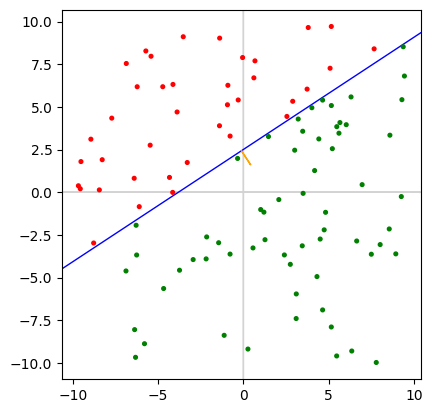

0.12131265494052916


In [57]:
def get_dataset(a, a0, n, s):  
    X, y = [], []
    d = a.shape[0]
    
    for _ in range(n):
        x = np.array([ rn.choice( [-1, 1] )*s*rn.random() for _ in range(d)])
        X.append( x )
        y.append( 1 if a.T.dot(x) + a0 > 0 else -1  )
    X = np.array(X).T
    y = np.array(y)
    
    return X, y

a = np.array( [ [1], [-1.5]  ] )
a0 = 4
n = 100
s = 10

X, y = get_dataset(a,a0,n,s)

a, a0, m = perceptron(X, y, t=100)

plot_separation(X, y, a, a0, name=None)
print(m)

## Esercizio 4

Scrivere una funzione, chiamata `flip_labels` che perturbi il dataset fornito dalla  precedente funzione invertendo, con una probabilità p, i valori delle etichette 

La funzione prenda in input il vettore delle etichette `y` di dimensione $1 \times d$, la probabilità `p` e ritorni il nuovo vettore delle etichette perturbato.

Cosa può essere utile: la funzione random.random() restituisce un numero pseudo-casuale
in [0,1)

In [64]:
# In[Esercizio 4]
'''
Scrivere una funzione che perturbi il dataset invertendo i valori delle etichette
con una probabilità p.

La funzione prenda in input il vettore delle etichette y di dimensione 1xd, la probabilità p
e ritorni il nuovo vettore delle etichette perturbato

Cosa può essere utile: la funzione random.random() restituisce un numero pseudo-casuale
in [0,1)
'''

def flip_labels(y, p):
    return  np.array([ -1*lab if rn.random() < p else lab for lab in y  ])
    

# oppure senza usare liste

def flip_labels(y, p):
    n = y.shape[0]

    f = np.random.uniform(size=n) < (np.zeros(n)+p)   #  # True con probabilità p
    f = np.where(f, -1, 1)
    return y*f

yf = flip_labels(y, 0.001)
a, a0, m = perceptron(X, yf, t=100)
print(m)

0.12131265494052916


# Classificazione di traiettorie

$D$ è un dataset contenente 120 percorsi gps registrati in auto e a piedi. Di ogni percorso conosciamo le coordinate geografiche della sequenza di punti che lo compongono e l'etichetta. Si vuole addestrare un classificatore che riconosca se un percorso è stato compiuto a piedi o in auto.

## Il dataset

Il dataset è in formato [shapefile](https://enterprise.arcgis.com/it/portal/latest/use/shapefiles.htm). Si tratta di un formato vettoriale sviluppato da ESRI per i sistemi informativi geografici (GIS). Lo shapefile descrive punti, polilinee o poligoni ed è conposto da più file con estensioni .shp, .dbf, .shx che hanno in comune il prefisso del nome.

Lo shapefile può essere importato in modo conveniente con la libreria [geopandas](https://geopandas.org). Questa è una estensione della libreria [pandas](https://pandas.pydata.org/) per consentiere di lavorare con dati geospaziali, consentendo la manipolazione e l'analisi di dati geografici in modo efficiente. La struttura principale è il `GeoDataFrame`, una struttura dati tabellare dove ogni riga rappresenta un'entità geografica (punto, una linea o un poligono) con attributi associati. I dati geospaziali vengono gestiti dalla libreria [shapely](https://pypi.org/project/shapely/), una libreria Python per la manipolazione e l'analisi delle geometrie.

Nel codice seguente, dopo aver importato una serie di librerie, carichiamo il file che contine le triettorie

In [66]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

trails_gdf = gpd.read_file('trails.shp')

che appare in questo modo

In [68]:
trails_gdf

,profiles,geometry
0,foot-walking,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
1,driving-car,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
2,driving-car,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
3,driving-car,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
4,driving-car,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
...,...,...
115,foot-walking,"LINESTRING (12.50369 41.90154, 12.50364 41.901..."
116,foot-walking,"LINESTRING (12.50369 41.90154, 12.50364 41.901..."
117,foot-walking,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."
118,foot-walking,"LINESTRING (12.50369 41.90154, 12.50373 41.901..."


Il `GeoDataFrame` contiene due colonne: `profiles` è l'etichetta, `geometry` descrive la traiettoria usando la struttura dati `linestring` della libreria shapely 

<Axes: >

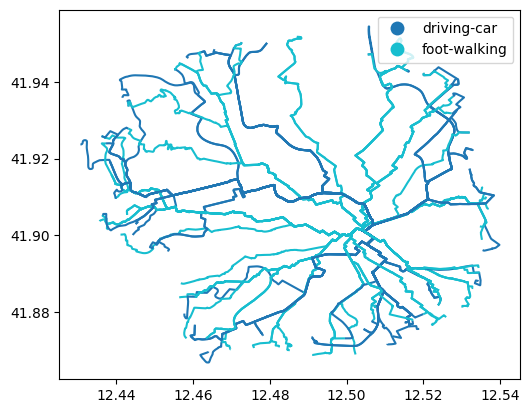

In [69]:
trails_gdf.plot(column='profiles', legend=True)

Le coordinate dei punti nelle `linestring` sono angoli, è più oppurtuno convertire i punti utilizzando *coordinate proiettate* ovvero coordinate cartesiane bidimensionali che mappano la superficie curva della Terra su un piano piatto in questo modo si possono misurare le distanze e angoli in unità di lunghezza (come metri o piedi) anziché in gradi. Affinché la poiezione non causi distorsioni, bisogna scegliere un *sistema di riferimento* adeguato che dipenderà dall'area geografica a cui si è interessati. Il nostro dataset è stato prodotto a Roma quindi L'UTM33 può essere una buona scelta. Per maggiori informazioni si legga [qui](https://docs.qgis.org/2.18/en/docs/gentle_gis_introduction/coordinate_reference_systems.html).

In [70]:
trails_gdf.crs = "EPSG:4326"
trails_gdf.to_crs(epsg='3857', inplace=True)

Il valore assegnato al campo crs stabilisce il corrente sistema di riferimento, il codice EPSG:4326 è relativo al sistema di coordinate geografiche. La riga successiva trasforma questo nel sistema di riferimento corrispondente al codice EPSG:3857 che corrisponde alla proiezione *Web Mercator* largamente utilizzata dalle applicazioni di mapping quali Google Maps, OpenStreetMap, Bing...

Questo è il contenuto del dataset dopo la trasformazione. Ora le coordinate sono in metri e quindi geometriche pertanto d'ora in poi possiamo utilizzare le funzioni della libreria shapely.

In [71]:
trails_gdf

,profiles,geometry
0,foot-walking,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
1,driving-car,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
2,driving-car,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
3,driving-car,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
4,driving-car,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
...,...,...
115,foot-walking,"LINESTRING (1391904.738 5146242.155, 1391898.6..."
116,foot-walking,"LINESTRING (1391904.738 5146242.155, 1391898.6..."
117,foot-walking,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
118,foot-walking,"LINESTRING (1391904.738 5146242.155, 1391908.4..."
